In [1]:
# import necessary libraries
from PCAfold import VQPCA
import matplotlib.pyplot as plt
import numpy as np

## First test of library

| It.   | Rec. error      | Error conv.? | Cent. conv.? | Cluster 1  | Cluster 2  | Time [min]   |
| 1     | 1.30202777      | False        | False        | 557        | 1443       | 5e-05        |
| 2     | 0.40237939      | False        | False        | 714        | 1286       | 8e-05        |
| 3     | 0.37230373      | False        | False        | 817        | 1183       | 0.00012      |
| 4     | 0.36008514      | False        | False        | 889        | 1111       | 0.00015      |
| 5     | 0.35405723      | False        | False        | 944        | 1056       | 0.00018      |
| 6     | 0.35115645      | False        | False        | 967        | 1033       | 0.00021      |
| 7     | 0.35069036      | False        | False        | 978        | 1022       | 0.00025      |
| 8     | 0.35052587      | False        | False        | 991        | 1009       | 0.00027      |
| 9     | 0.35037199      | False        | False        | 994        | 1006       | 0.00031      |
| 10    | 

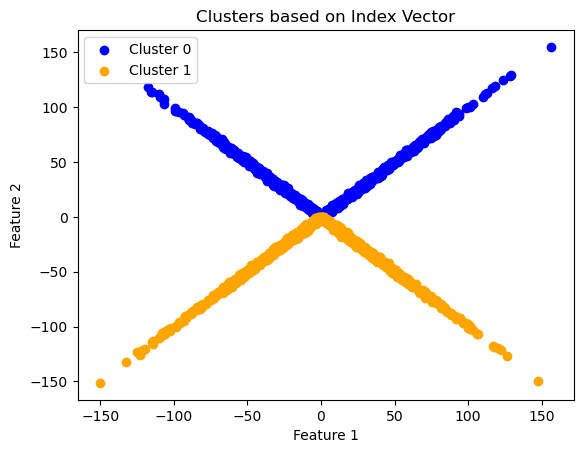

In [75]:
n_points = 1000

# Parameters for cluster 1
mean_local_1 = [0, 0]
covariance_local_1 = np.array([[2000, 1999], [1999, 2000]])  # Swap off-diagonal elements

# Parameters for cluster 2
mean_local_2 = [0, 0]
covariance_local_2 = np.array([[2000, -1999], [-1999, 2000]])  # Swap off-diagonal elements

# Parameters for cluster 3
mean_local_3 = [0, 0]
covariance_local_3 = np.array([[1, 0], [0, 2000]])  # Set off-diagonal element to 0

# Generate samples for each cluster
x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x_noise_3, y_noise_3 = np.random.multivariate_normal(mean_local_3, covariance_local_3, n_points).T

# Concatenate the data points
x_local = np.concatenate([x_noise_1, x_noise_2])
y_local = np.concatenate([y_noise_1, y_noise_2])

Dataset_local = np.hstack((x_local[:, np.newaxis], y_local[:, np.newaxis]))

# Instantiate VQPCA class object:
vqpca = VQPCA(
    Dataset_local,
    n_clusters=2,
    n_components=1,
    scaling='std',
    idx_init='random',
    random_state=42,
    max_iter=100,
    tolerance=1.0e-012,
    verbose=True
)

# Access the VQPCA clustering solution:
idx = vqpca.idx
#pcs = vqpca.A
#print(pcs)

# Separate data points based on cluster index
cluster_0 = Dataset_local[idx == 0]
cluster_1 = Dataset_local[idx == 1]
#cluster_2 = Dataset_local[idx == 2]
#cluster_3 = Dataset_local[idx == 3]

# Plot the clusters
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], label='Cluster 0', color='blue')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], label='Cluster 1', color='orange')
#plt.scatter(cluster_2[:, 0], cluster_2[:, 1], label='Cluster 2', color='green')
#plt.scatter(cluster_3[:, 0], cluster_3[:, 1], label='Cluster 3', color='yellow')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters based on Index Vector')

# Show legend
plt.legend()

# Show the plot
plt.show()